<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/kalman5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-497846cec422>:6: DeprecationWarning: `scipy.signal.ltisys.StateSpaceDiscrete` is deprecated along with the `scipy.signal.ltisys` namespace. `scipy.signal.ltisys.StateSpaceDiscrete` will be removed in SciPy 1.14.0, and the `scipy.signal.ltisys` namespace will be removed in SciPy 2.0.0.
  from scipy.signal.ltisys import StateSpaceDiscrete # Changed import to reflect the new location of StateSpaceDiscrete


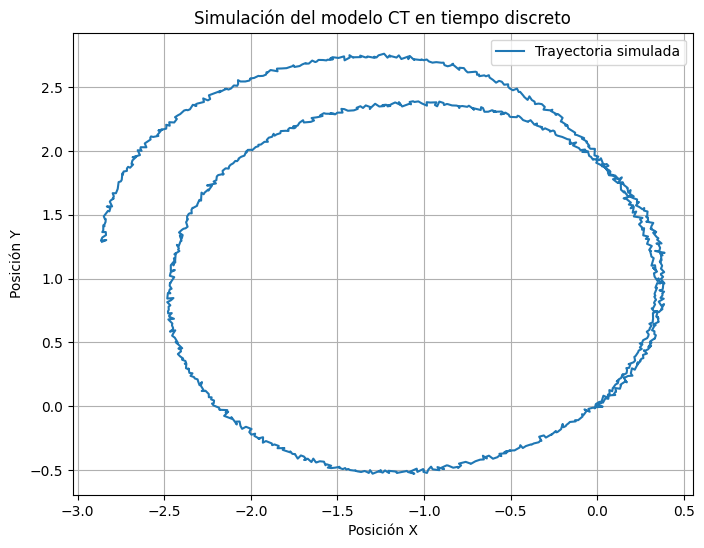

In [2]:
# Simulación del modelo CT en Google Colab

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import dlsim
from scipy.signal.ltisys import StateSpaceDiscrete # Changed import to reflect the new location of StateSpaceDiscrete

# Parámetros de simulación
maxT = 1000  # Número de pasos de simulación
dT = 0.1  # Período de muestreo
W = 0.1  # Frecuencia angular
WT = W * dT
sW = np.sin(WT)
cW = np.cos(WT)

# Definición de matrices del sistema
A = np.array([[1, sW/W, 0, (cW -1)/W],
              [0, cW, 0, -sW],
              [0, (1- cW)/W, 1, sW/W],
              [0, sW, 0, cW]])

Bw = np.array([[(1 - cW)/W**2, (sW - WT)/W**2],
               [sW/W, (cW - 1)/W],
               [(WT - sW)/W**2, (1 - cW)/W**2],
               [(1 - cW)/W, sW/W]])

C = np.array([[1, 0, 0, 0],
              [0, 0, 1, 0]])
D = np.zeros((2, 2))

# Generación de ruido
w = 0.01 * np.random.randn(maxT, 2)  # Entrada aleatoria
v = 0.01 * np.random.randn(maxT, 2)  # Ruido de medición
x0 = np.array([0, 0.1, 0, 0.1])  # Estado inicial

# Definir el sistema en espacio de estados discreto
ds_system = StateSpaceDiscrete(A, Bw, C, D, dt=dT)

# Simulación manual con lazo for
x = np.zeros((4, maxT))  # Almacenamiento de estados
x[:, 0] = x0
for k in range(1, maxT):
    x[:, k] = A @ x[:, k - 1] + Bw @ w[k - 1, :]

# Salida del sistema
y_measured = (C @ x).T + v  # Convertir dimensiones para graficar correctamente

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.plot(y_measured[:, 0], y_measured[:, 1], label="Trayectoria simulada")
plt.xlabel("Posición X")
plt.ylabel("Posición Y")
plt.title("Simulación del modelo CT en tiempo discreto")
plt.legend()
plt.grid()
plt.show()

